<a href="https://colab.research.google.com/github/KhyatiMahendru/Learning-Image-Segmentation/blob/master/ImageSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of concepts learnt from 
- https://www.analyticsvidhya.com/blog/2019/04/introduction-image-segmentation-techniques-python/

# Semantic Segmentation

In [1]:
from google.colab import files
uploaded = files.upload()

Saving 1.jpeg to 1 (1).jpeg


In [0]:
from skimage.color import rgb2gray
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('1.jpeg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img.shape

(192, 263, 3)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f7e23a47208>,
 <matplotlib.image.AxesImage at 0x7f7e23a3dd68>)

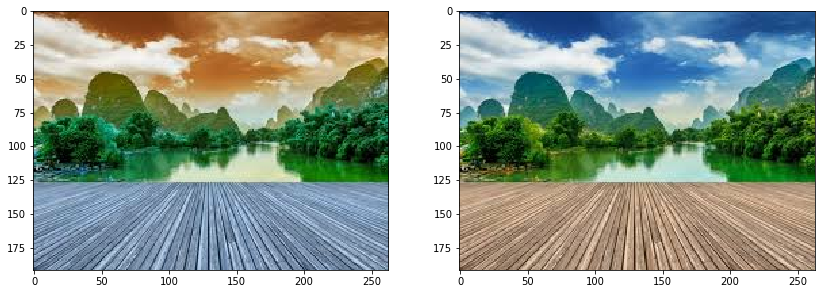

In [4]:
plt.figure(figsize = (14, 6))
plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(RGB_img)

# Region-based Segmentation (using Threshold)

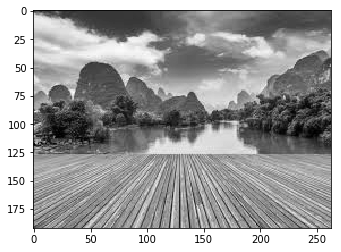

In [5]:
gray = rgb2gray(RGB_img)
plt.imshow(gray, cmap = 'gray')

In [6]:
gray.shape

(192, 263)

## Segementing into background and foreground

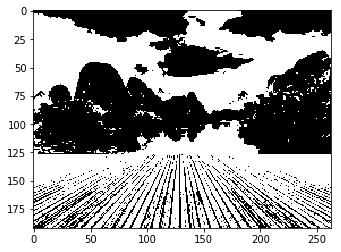

In [7]:
gray_r = gray.reshape(gray.shape[0] * gray.shape[1])
for i in range(gray_r.shape[0]):
  # foreground
  if gray_r[i] > gray_r.mean():
    gray_r[i] = 1
  # background
  else:
    gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0], gray.shape[1])
plt.imshow(gray, cmap = 'gray')

## Multiple Thresholds

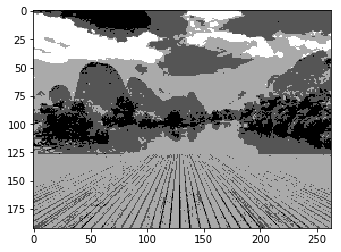

In [8]:
gray = rgb2gray(RGB_img)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

# Edge Detection Segmentation

The Sobel operator has two special edge detection filters.

The Sobel filter (horizontal):

|  1 |  2 |  1 |

|  0 |  0 |  0 |

| -1 | -2 | -1|

The Sobel filter (vertical):

| -1 |  0 |  1 |

| -2 |  0 |  2 |

| -1 |  0 |  1 |


In [9]:
uploaded = files.upload()

Saving index.png to index (1).png


(225, 225, 3)


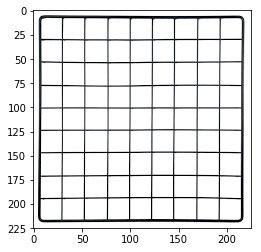

In [10]:
img2 = plt.imread('index.png')
print(img2.shape)
plt.imshow(img2)

In [0]:
gray2 = rgb2gray(img2)

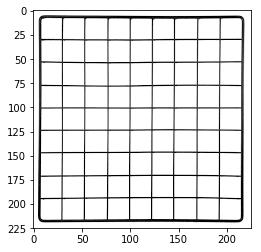

In [12]:
plt.imshow(gray2, cmap = 'gray')

In [13]:
sobel_h = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
print(sobel_h, 'is a kernel for detecting horizontal edges')

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] is a kernel for detecting horizontal edges


In [14]:
sobel_v = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
print(sobel_v, 'is a kernel for detecting vertical edges')

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] is a kernel for detecting vertical edges


In [0]:
from scipy import ndimage

In [0]:
# mode determines how input image is extended when the filter overlaps a border
out_h = ndimage.convolve(gray2, sobel_h, mode='reflect')
out_v = ndimage.convolve(gray2, sobel_v, mode='reflect')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f7e1f7980f0>,
 <matplotlib.image.AxesImage at 0x7f7e1f7210f0>)

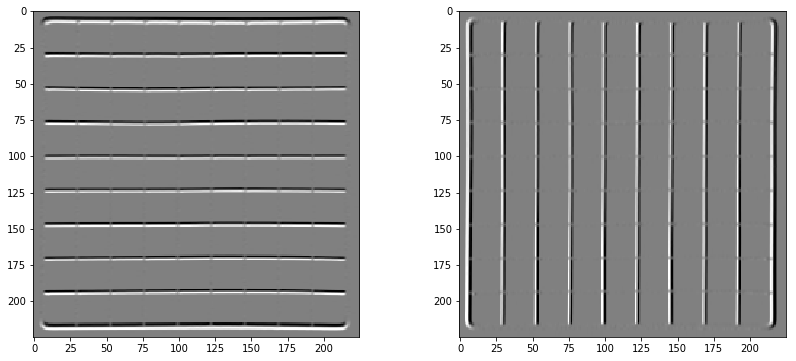

In [17]:
plt.figure(figsize = (14, 6))
plt.subplot(121), plt.imshow(out_h, cmap = 'gray')
plt.subplot(122), plt.imshow(out_v, cmap = 'gray')

Laplace operator for both horizontal and vertical edges:

|  1 |  1 |  1 |

|  1 | -8 |  1 |

|  1 |  1 |  1 |

In [18]:
laplace = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])
print(laplace, 'is a laplacian kernel')

[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]] is a laplacian kernel


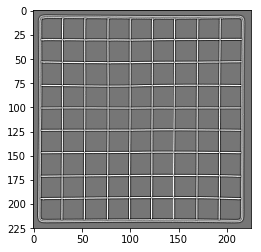

In [19]:
out_l = ndimage.convolve(gray2, laplace, mode = 'reflect')
plt.imshow(out_l, cmap = 'gray')

# Image Segmentation based on Clustering

(192, 263, 3)


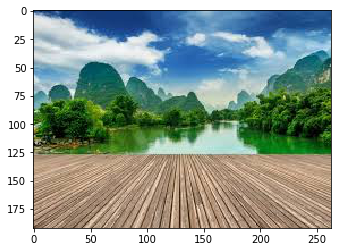

In [20]:
img4 = plt.imread('1.jpeg')/255
print(img4.shape)
plt.imshow(img4)

In [21]:
# reshape into 2d array
img4_2d = img4.reshape(img4.shape[0] * img4.shape[1], img4.shape[2])
img4_2d.shape

(50496, 3)

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(img4_2d)
img42show = kmeans.cluster_centers_[kmeans.labels_]

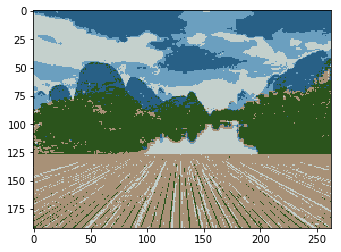

In [23]:
img_cluster = img42show.reshape(img4.shape[0], img4.shape[1], img4.shape[2])
plt.imshow(img_cluster)